In [1]:
# Import packages
import geopandas as gpd
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/rabi 2016-2017/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Insurance Unit', 'Gram Panchayat/Hobli', 'Crop', 'IRR_RF', 'Area_Sown_Ha', \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Name_Of_Higher_Level', 'No_CCE_Conducted_Higher', 'Higher Average Yield(Kg/Ha)', 'Synthetic Yield']

yields_rabi2016 = pd.concat(yields, ignore_index=True)
yields_rabi2016['Season'] = 'Rabi'
yields_rabi2016['Year'] = 2016

yields_rabi2016['Crop'] = yields_rabi2016['Crop'].str.lower()
yields_rabi2016 = yields_rabi2016.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_rabi2016.columns):
    yields_rabi2016['IRR_RF'] = np.nan
    for i in range(len(yields_rabi2016)):
        if yields_rabi2016.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_rabi2016.loc[i, 'IRR_RF'] = 'irr'
        elif yields_rabi2016.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_rabi2016.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_rabi2016.columns):
    yields_rabi2016['Gram Panchayat Name'].update(yields_rabi2016.pop('Hobli Name'))
    yields_rabi2016.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                  
yields_rabi2016 = yields_rabi2016[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [3]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/rabi 2017-2018/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Insurance Unit', 'Gram Panchayat/Hobli', 'Crop', 'IRR_RF', 'Area_Sown_Ha', \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Name_Of_Higher_Level', 'No_CCE_Conducted_Higher', 'Higher Average Yield(Kg/Ha)']

yields_rabi2017 = pd.concat(yields, ignore_index=True)
yields_rabi2017['Season'] = 'Rabi'
yields_rabi2017['Year'] = 2017

yields_rabi2017['Crop'] = yields_rabi2017['Crop'].str.lower()
yields_rabi2017 = yields_rabi2017.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_rabi2017.columns):
    yields_rabi2017['IRR_RF'] = np.nan
    for i in range(len(yields_rabi2017)):
        if yields_rabi2017.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_rabi2017.loc[i, 'IRR_RF'] = 'irr'
        elif yields_rabi2017.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_rabi2017.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_rabi2017.columns):
    yields_rabi2017['Gram Panchayat Name'].update(yields_rabi2017.pop('Hobli Name'))
    yields_rabi2017.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)            
                  
yields_rabi2017 = yields_rabi2017[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [4]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/rabi 2018-2019/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Gram Panchayat/Hobli', 'Hobli Name', 'Gram Panchayat Name', 'Crop', 'IRR_RF',  \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Higher Average Yield(Kg/Ha)', 'Name_Of_Higher_Level']

yields_rabi2018 = pd.concat(yields, ignore_index=True)
yields_rabi2018['Season'] = 'Rabi'
yields_rabi2018['Year'] = 2018

yields_rabi2018['Crop'] = yields_rabi2018['Crop'].str.lower()
yields_rabi2018 = yields_rabi2018.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_rabi2018.columns):
    yields_rabi2018['IRR_RF'] = np.nan
    for i in range(len(yields_rabi2018)):
        if yields_rabi2018.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_rabi2018.loc[i, 'IRR_RF'] = 'irr'
        elif yields_rabi2018.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_rabi2018.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_rabi2018.columns):
    yields_rabi2018['Gram Panchayat Name'].update(yields_rabi2018.pop('Hobli Name'))
    yields_rabi2018.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_rabi2018 = yields_rabi2018[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [5]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/kharif 2016-2017/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Insurance Unit', 'Gram Panchayat/Hobli', 'Crop', \
    'Average Yield(Kg/Ha)', 'Higher Average Yield(Kg/Ha)', 'TAC Yield'] #Technical advisory committee yield

yields_kharif2016 = pd.concat(yields, ignore_index=True)
yields_kharif2016['Season'] = 'Kharif'
yields_kharif2016['Year'] = 2016

yields_kharif2016['Crop'] = yields_kharif2016['Crop'].str.lower()
yields_kharif2016 = yields_kharif2016.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_kharif2016.columns):
    yields_kharif2016['IRR_RF'] = np.nan
    for i in range(len(yields_kharif2016)):
        if yields_kharif2016.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_kharif2016.loc[i, 'IRR_RF'] = 'irr'
        elif yields_kharif2016.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_kharif2016.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_kharif2016.columns):
    yields_kharif2016['Gram Panchayat Name'].update(yields_kharif2016.pop('Hobli Name'))
    yields_kharif2016.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_kharif2016 = yields_kharif2016[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [6]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/kharif 2017-2018/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Insurance Unit', 'Gram Panchayat/Hobli', 'Crop', 'IRR_RF', 'Area_Sown_Ha', \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Name_Of_Higher_Level', 'No_CCE_Conducted_Higher', 'Higher Average Yield(Kg/Ha)', 'Synthetic Yield']

yields_kharif2017 = pd.concat(yields, ignore_index=True)
yields_kharif2017['Season'] = 'Kharif'
yields_kharif2017['Year'] = 2017

yields_kharif2017['Crop'] = yields_kharif2017['Crop'].str.lower()
yields_kharif2017 = yields_kharif2017.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_kharif2017.columns):
    yields_kharif2017['IRR_RF'] = np.nan
    for i in range(len(yields_kharif2017)):
        if yields_kharif2017.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_kharif2017.loc[i, 'IRR_RF'] = 'irr'
        elif yields_kharif2017.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_kharif2017.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_kharif2017.columns):
    yields_kharif2017['Gram Panchayat Name'].update(yields_kharif2017.pop('Hobli Name'))
    yields_kharif2017.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_kharif2017 = yields_kharif2017[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [7]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/kharif 2018-2019/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Gram Panchayat/Hobli', 'Hobli Name', 'Gram Panchayat Name', 'Crop', 'IRR_RF',  \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Higher Average Yield(Kg/Ha)', 'Name_Of_Higher_Level']

yields_kharif2018 = pd.concat(yields, ignore_index=True)
yields_kharif2018['Season'] = 'Kharif'
yields_kharif2018['Year'] = 2018

yields_kharif2018['Crop'] = yields_kharif2018['Crop'].str.lower()
yields_kharif2018 = yields_kharif2018.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_kharif2018.columns):
    yields_kharif2018['IRR_RF'] = np.nan
    for i in range(len(yields_kharif2018)):
        if yields_kharif2018.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_kharif2018.loc[i, 'IRR_RF'] = 'irr'
        elif yields_kharif2018.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_kharif2018.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_kharif2018.columns):
    yields_kharif2018['Gram Panchayat Name'].update(yields_kharif2018.pop('Hobli Name'))
    yields_kharif2018.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_kharif2018 = yields_kharif2018[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [8]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/summer 2016-2017/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Insurance Unit', 'Gram Panchayat/Hobli', 'Crop', 'IRR_RF', 'Area_Sown_Ha', \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Name_Of_Higher_Level', 'No_CCE_Conducted_Higher', 'Higher Average Yield(Kg/Ha)', 'Synthetic Yield']

yields_summer2016 = pd.concat(yields, ignore_index=True)
yields_summer2016['Season'] = 'Summer'
yields_summer2016['Year'] = 2016

yields_summer2016['Crop'] = yields_summer2016['Crop'].str.lower()
yields_summer2016 = yields_summer2016.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_summer2016.columns):
    yields_summer2016['IRR_RF'] = np.nan
    for i in range(len(yields_summer2016)):
        if yields_summer2016.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_summer2016.loc[i, 'IRR_RF'] = 'irr'
        elif yields_summer2016.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_summer2016.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_summer2016.columns):
    yields_summer2016['Gram Panchayat Name'].update(yields_summer2016.pop('Hobli Name'))
    yields_summer2016.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_summer2016 = yields_summer2016[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [9]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/summer 2017-2018/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Insurance Unit', 'Gram Panchayat/Hobli', 'Crop', 'IRR_RF', 'Area_Sown_Ha', \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Name_Of_Higher_Level', 'No_CCE_Conducted_Higher', 'Higher Average Yield(Kg/Ha)']

yields_summer2017 = pd.concat(yields, ignore_index=True)
yields_summer2017['Season'] = 'Summer'
yields_summer2017['Year'] = 2017

yields_summer2017['Crop'] = yields_summer2017['Crop'].str.lower()
yields_summer2017 = yields_summer2017.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_summer2017.columns):
    yields_summer2017['IRR_RF'] = np.nan
    for i in range(len(yields_summer2017)):
        if yields_summer2017.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_summer2017.loc[i, 'IRR_RF'] = 'irr'
        elif yields_summer2017.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_summer2017.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_summer2017.columns):
    yields_summer2017['Gram Panchayat Name'].update(yields_summer2017.pop('Hobli Name'))
    yields_summer2017.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_summer2017 = yields_summer2017[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [10]:
path = 'C:/Users/mieke/Documents/Msc Thesis/Datasets/Yield data/Karnataka/summer 2018-2019/'
file_names = os.listdir(path)
yields = {}
for i in range(len(file_names)):
    current_path = path + file_names[i]
    yields[format(i)] = pd.read_csv(current_path)
    if yields[str(i)].columns[0] == 'S.N' or yields[str(i)].columns[0] == 'Sl.No':
        yields[str(i)] = yields[str(i)].iloc[:,1:]
    yields[str(i)].columns = ['District', 'Taluk', 'Gram Panchayat/Hobli', 'Hobli Name', 'Gram Panchayat Name', 'Crop', 'IRR_RF',  \
    'No_CCE_Conducted', 'Average Yield(Kg/Ha)', 'Higher Average Yield(Kg/Ha)', 'Name_Of_Higher_Level']

yields_summer2018 = pd.concat(yields, ignore_index=True)
yields_summer2018['Season'] = 'Summer'
yields_summer2018['Year'] = 2018

yields_summer2018['Crop'] = yields_summer2018['Crop'].str.lower()
yields_summer2018 = yields_summer2018.dropna(subset = 'Crop').reset_index()

if 'IRR_RF' not in list(yields_summer2018.columns):
    yields_summer2018['IRR_RF'] = np.nan
    for i in range(len(yields_summer2018)):
        if yields_summer2018.loc[i, 'Crop'][-11:] == '(irrigated)':
            yields_summer2018.loc[i, 'IRR_RF'] = 'irr'
        elif yields_summer2018.loc[i, 'Crop'][-15:] == '(non irrigated)':
            yields_summer2018.loc[i, 'IRR_RF'] = 'rf'

if 'Insurance Unit' not in list(yields_summer2018.columns):
    yields_summer2018['Gram Panchayat Name'].update(yields_summer2018.pop('Hobli Name'))
    yields_summer2018.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)
                      
yields_summer2018 = yields_summer2018[['Year', 'Season', 'Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Crop', 'IRR_RF', 'Average Yield(Kg/Ha)']]

In [11]:
yields_list = {'yields_kharif2016' :yields_kharif2016, 'yields_kharif2017': yields_kharif2017, 'yields_kharif2018': yields_kharif2018, \
    'yields_rabi2016': yields_rabi2016, 'yields_rabi2017': yields_rabi2017, 'yields_rabi2018': yields_rabi2018, \
        'yields_summer2016': yields_summer2016, 'yields_summer2017': yields_summer2017, 'yields_summer2018': yields_summer2018}   

yields = pd.concat(yields_list, ignore_index=True)   

In [12]:
yields['Gram Panchayat/Hobli'] = yields['Gram Panchayat/Hobli'].str.lower()
yields['District'] = yields['District'].str.lower()
yields['Taluk'] = yields['Taluk'].str.lower()
yields['IRR_RF'] = yields['IRR_RF'].str.lower()
yields['Insurance Unit'] = yields['Insurance Unit'].str.lower()

yields = yields.dropna(subset = 'Insurance Unit').reset_index(drop=True)

yields['IRR_RF'].replace("[\(]irrigated[\)]", "irr", regex=True, inplace=True)
yields['IRR_RF'].replace("[\(]non irrigated[\)]", "rf", regex=True, inplace=True)
yields['IRR_RF'].replace("[\(]ns[\)]", "ns", regex=True, inplace=True) # assumption
yields['IRR_RF'].replace("[\(]unspecified[\)]", "ns", regex=True, inplace=True) # assumption

yields['IRR_RF'].replace("non irrigated", "rf", regex=True, inplace=True)
yields['IRR_RF'].replace("irrigated", "irr", regex=True, inplace=True)
yields['IRR_RF'].replace("unspecified", "ns", regex=True, inplace=True) # assumption
yields['IRR_RF'].replace("ns", "ns", regex=True, inplace=True) # assumption

for i in range(len(yields)):
    if yields.loc[i, 'Crop'][-13:] == '(unspecified)' and pd.isna(yields.loc[i, 'IRR_RF']):
        yields.loc[i, 'IRR_RF'] = 'ns' # assumption       
    elif yields.loc[i, 'Crop'][-4:] == '(ns)' and pd.isna(yields.loc[i, 'IRR_RF']):
        yields.loc[i, 'IRR_RF'] = 'ns' # assumption

yields['Crop'].replace("[\(]unspecified[\)]", "", regex=True, inplace=True)
yields['Crop'].replace("[\(]ns[\)]", "", regex=True, inplace=True)
yields['Crop'].replace("[\(]irrigated[\)]", "", regex=True, inplace=True)
yields['Crop'].replace("[\(]non irrigated[\)]", "", regex=True, inplace=True)

yields['Gram Panchayat/Hobli'].replace("gram panchyat", "gp", regex=True, inplace=True)
yields['Gram Panchayat/Hobli'].replace("grama panchayat", "gp", regex=True, inplace=True)
yields['Gram Panchayat/Hobli'].replace("gram panchayat", "gp", regex=True, inplace=True)
#yields['Gram Panchayat/Hobli'].replace("gram panchayat ", "gp", regex=True, inplace=True)
yields['Gram Panchayat/Hobli'].replace("hobli", "h", regex=True, inplace=True)
yields['Gram Panchayat/Hobli'].replace("\s+$", "", regex=True, inplace=True)  

if 'Insurance Unit' not in list(yields.columns):
    yields['Gram Panchayat Name'].update(yields.pop('Hobli Name'))
    yields.rename(columns ={'Gram Panchayat Name': 'Insurance Unit'}, inplace=True)

yields['Insurance Unit'].replace("[\(]h[\)]", "", regex=True, inplace=True)
yields['Insurance Unit'].replace("[\(]ulb[\)]", "", regex=True, inplace=True)
yields['Insurance Unit'].replace("[\(]gp[\)]", "", regex=True, inplace=True)
yields['Insurance Unit'].replace("[\(]hobli[\)]", "", regex=True, inplace=True)
yields['Insurance Unit'].replace("[\(]gram panchyat[\)]", "", regex=True, inplace=True)    
yields['Insurance Unit'].replace("\s+$", "", regex=True, inplace=True)  

yields = yields.drop_duplicates(ignore_index=True)

In [13]:
yields_nan = yields[yields['Average Yield(Kg/Ha)'].isna()] # All observations for which we do not have an average yield
print(np.size(yields_nan,0)) # 20.066 observations

print(np.size(yields,0)) # 68.952 observations , 67.531 observations
yields = yields.dropna(subset = 'Average Yield(Kg/Ha)').reset_index(drop=True) # Drop all observations w/o average yield
print(np.size(yields,0)) # 48.886 observations, 47889 observations

print(np.size(yields.drop_duplicates(),0)) # There are no duplicates

19642
67531
47889
47889


In [14]:
# The amount of observations that we loose when we drop nan values wrt average yield
print(np.size(yields_nan[yields_nan['Crop'] == 'paddy'],0)) # 2587
print(np.size(yields_nan[yields_nan['Crop'] == 'maize (makka)'],0)) # 1619
print(np.size(yields_nan[yields_nan['Crop'] == 'sorghum (jowar/great millet)'],0)) # 2207
print(np.size(yields_nan,0)) # 20066

2505
1593
2189
19642


In [15]:
# Information
len(yields['Crop'].unique()) # Number of crop types
# Table 1 Information
print('Year, Season, District, Total observations, Obs Paddy, irr, Obs Maize, irr, Obs Sorghum, irr')
for s in sorted(yields['Season'].unique()):
    for y in sorted(yields['Year'].unique()):  
        print(str(y) + ',' + s + ',' + str(len(yields[(yields['Year'] == y) & (yields['Season'] == s)]['District'].unique())) + ',' + str(np.size(yields[(yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['Crop'] == 'paddy') & (yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['IRR_RF'] == 'irr') & (yields['Crop'] == 'paddy') & (yields['Year'] == y) & (yields['Season'] == s)],0) / (np.size(yields[(yields['IRR_RF'] == 'irr') & (yields['Crop'] == 'paddy') & (yields['Year'] == y) & (yields['Season'] == s)],0) + np.size(yields[(yields['IRR_RF'] == 'rf') & (yields['Crop'] == 'paddy') & (yields['Year'] == y) & (yields['Season'] == s)],0))) + ',' + str(np.size(yields[(yields['Crop'] == 'maize (makka)') & (yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['IRR_RF'] == 'irr') & (yields['Crop'] == 'maize (makka)') & (yields['Year'] == y) & (yields['Season'] == s)],0) / (np.size(yields[(yields['IRR_RF'] == 'irr') & (yields['Crop'] == 'maize (makka)') & (yields['Year'] == y) & (yields['Season'] == s)],0) + np.size(yields[(yields['IRR_RF'] == 'rf') & (yields['Crop'] == 'maize (makka)') & (yields['Year'] == y) & (yields['Season'] == s)],0))) + ',' + str(np.size(yields[(yields['Crop'] == 'sorghum (jowar/great millet)') & (yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['IRR_RF'] == 'irr') & (yields['Crop'] == 'sorghum (jowar/great millet)') & (yields['Year'] == y) & (yields['Season'] == s)],0) / (np.size(yields[(yields['IRR_RF'] == 'irr') & (yields['Crop'] == 'sorghum (jowar/great millet)') & (yields['Year'] == y) & (yields['Season'] == s)],0) + np.size(yields[(yields['IRR_RF'] == 'rf') & (yields['Crop'] == 'sorghum (jowar/great millet)') & (yields['Year'] == y) & (yields['Season'] == s)],0) + 0.0000000000000000000000000000000001)))
#         print(str(y) + ',' + s + ',' + str(np.size(yields[(yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['IRR_RF'] == 'ns') & (yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['Crop'] == 'paddy') & (yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['Crop'] == 'maize (makka)') & (yields['Year'] == y) & (yields['Season'] == s)],0)) + ',' + str(np.size(yields[(yields['Crop'] == 'sorghum (jowar/great millet)') & (yields['Year'] == y) & (yields['Season'] == s)],0)))
print('Total,' + str(np.size(yields,0)) + ',' + str(np.size(yields[(yields['Crop'] == 'paddy')],0)) + ',' + str(np.size(yields[(yields['Crop'] == 'maize (makka)')],0)) + ',' + str(np.size(yields[(yields['Crop'] == 'sorghum (jowar/great millet)')],0))) 

# Besides note that 'ns' does not occur for the crop types of interest

Year, Season, District, Total observations, Obs Paddy, irr, Obs Maize, irr, Obs Sorghum, irr
2016,Kharif,30,11951,2608,0.5601993865030674,2493,0.35900521460088247,363,0.24242424242424243
2017,Kharif,29,10449,2196,0.581056466302368,2263,0.3499779054352629,233,0.18025751072961374
2018,Kharif,29,9748,2311,0.5374296841194288,2047,0.35906204201270153,178,0.15168539325842698
2016,Rabi,26,3550,192,1.0,274,0.9890510948905109,1307,0.11400153022188217
2017,Rabi,27,5237,232,1.0,307,0.9674267100977199,1814,0.10694597574421169
2018,Rabi,27,4980,203,1.0,275,0.9781818181818182,1741,0.10568638713383113
2016,Summer,21,549,223,1.0,26,1.0,6,1.0
2017,Summer,22,747,395,1.0,17,1.0,2,1.0
2018,Summer,21,678,400,1.0,8,1.0,0,0.0
Total,47889,8760,7710,5644


In [16]:
# Create dataframe only containing observations for the crop type of interest
yields_interest = yields[(yields['Crop'] == 'paddy') | (yields['Crop'] == 'maize (makka)') | (yields['Crop'] == 'sorghum (jowar/great millet)')].reset_index(drop=True)
yields_sorted = yields_interest.sort_values(['Insurance Unit', 'Crop', 'IRR_RF', 'Season', 'Year'], ascending=[True, True, True, True, True], ignore_index=True) # sort the data

unit_names = yields_sorted.iloc[:,2:7] # 22.114
unit_names = unit_names.drop_duplicates(ignore_index=True) # 7190

In [17]:
unique_year = sorted(yields_interest['Year'].unique())
unique_season = sorted(yields_interest['Season'].unique())
unique_gph = sorted(yields_interest['Gram Panchayat/Hobli'].unique())
unique_district = sorted(yields_interest['District'].unique())
unique_taluk = sorted(yields_interest['Taluk'].unique())
unique_crop = sorted(yields_interest['Crop'].unique())
unique_irrrf = sorted(yields_interest['IRR_RF'].unique())
unique_averageyield = sorted(yields_interest['Average Yield(Kg/Ha)'].unique())

In [18]:
yields.to_excel(r'D:\other_thesis\codes_latestversion\general\files\yields.xlsx', header=True, index=True)
unit_names.to_excel(r'D:\other_thesis\codes_latestversion\general\files\unit_names.xlsx', header=True, index=True)

Some plots on yield data

8052


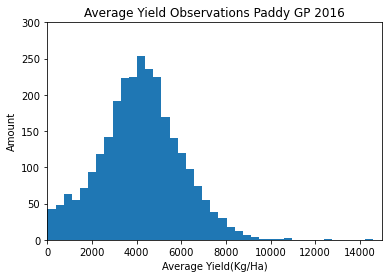

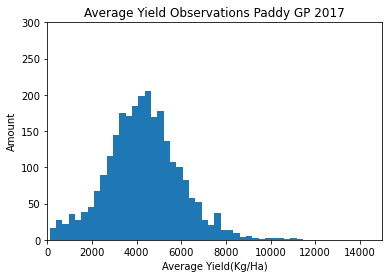

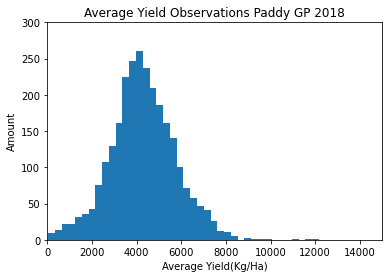

In [19]:
# Plot distribution observations
data = yields_interest[(yields_interest['Gram Panchayat/Hobli'] == 'gp') & (yields_interest['Crop'] == 'paddy')] # 8081
data = data[data['Average Yield(Kg/Ha)'] != 0] 
print(np.size(data,0)) # 8052
data_2016 = data[data['Year'] == 2016]
data_2017 = data[data['Year'] == 2017]
data_2018 = data[data['Year'] == 2018]
avg_value_2016 = np.mean(data_2016['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2016 = np.median(data_2016['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2017 = np.mean(data_2017['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2017 = np.median(data_2017['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2018 = np.mean(data_2018['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2018 = np.median(data_2018['Average Yield(Kg/Ha)']) # 3759 kg/ha  


plt.hist(data_2016['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Paddy GP 2016')
plt.xlim([0,15000])
plt.ylim([0,300])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2017['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Paddy GP 2017')
plt.xlim([0,15000])
plt.ylim([0,300])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2018['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Paddy GP 2018')
plt.xlim([0,15000])
plt.ylim([0,300])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

679


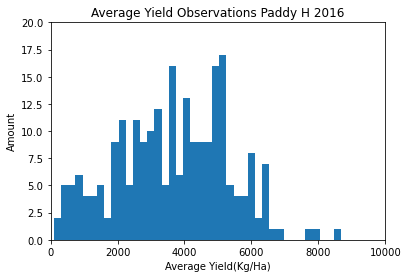

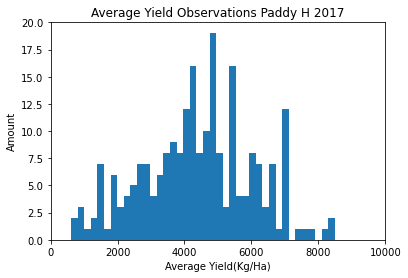

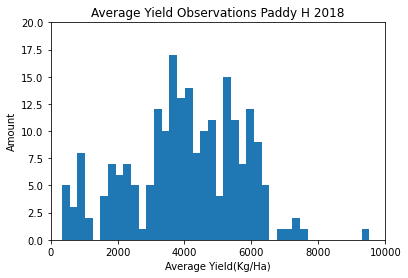

In [20]:
# Plot distribution observations
data = yields_interest[(yields_interest['Gram Panchayat/Hobli'] == 'h') & (yields_interest['Crop'] == 'paddy')] # 8081
data = data[data['Average Yield(Kg/Ha)'] != 0] 
print(np.size(data,0)) # 679
data_2016 = data[data['Year'] == 2016]
data_2017 = data[data['Year'] == 2017]
data_2018 = data[data['Year'] == 2018]
avg_value_2016 = np.mean(data_2016['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2016 = np.median(data_2016['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2017 = np.mean(data_2017['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2017 = np.median(data_2017['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2018 = np.mean(data_2018['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2018 = np.median(data_2018['Average Yield(Kg/Ha)']) # 3759 kg/ha  


plt.hist(data_2016['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Paddy H 2016')
plt.xlim([0,10000])
plt.ylim([0,20])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2017['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Paddy H 2017')
plt.xlim([0,10000])
plt.ylim([0,20])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2018['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Paddy H 2018')
plt.xlim([0,10000])
plt.ylim([0,20])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

6507


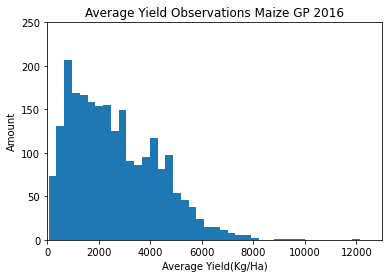

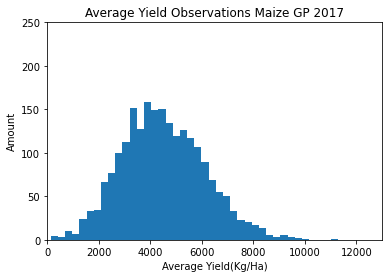

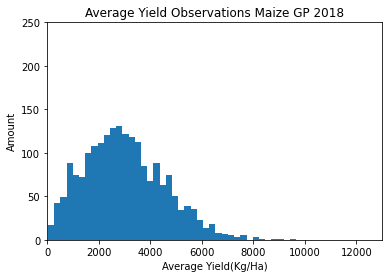

In [21]:
# Plot distribution observations
data = yields_interest[(yields_interest['Gram Panchayat/Hobli'] == 'gp') & (yields_interest['Crop'] == 'maize (makka)')] # 8081
data = data[data['Average Yield(Kg/Ha)'] != 0]
print(np.size(data,0)) # 6507
data_2016 = data[data['Year'] == 2016]
data_2017 = data[data['Year'] == 2017]
data_2018 = data[data['Year'] == 2018]
avg_value_2016 = np.mean(data_2016['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2016 = np.median(data_2016['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2017 = np.mean(data_2017['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2017 = np.median(data_2017['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2018 = np.mean(data_2018['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2018 = np.median(data_2018['Average Yield(Kg/Ha)']) # 3759 kg/ha  


plt.hist(data_2016['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Maize GP 2016')
plt.xlim([0,13000])
plt.ylim([0,250])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2017['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Maize GP 2017')
plt.xlim([0,13000])
plt.ylim([0,250])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2018['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Maize GP 2018')
plt.xlim([0,13000])
plt.ylim([0,250])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

1159


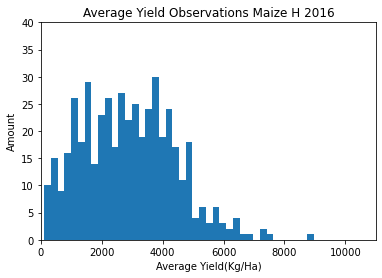

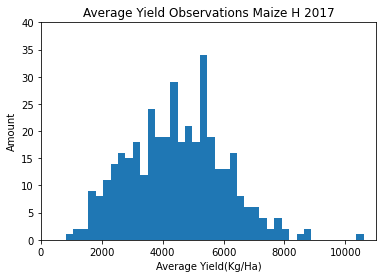

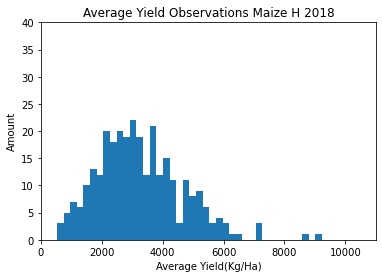

In [22]:
# Plot distribution observations
data = yields_interest[(yields_interest['Gram Panchayat/Hobli'] == 'h') & (yields_interest['Crop'] == 'maize (makka)')] # 8081
data = data[data['Average Yield(Kg/Ha)'] != 0]
print(np.size(data,0)) # 1159
data_2016 = data[data['Year'] == 2016]
data_2017 = data[data['Year'] == 2017]
data_2018 = data[data['Year'] == 2018]
avg_value_2016 = np.mean(data_2016['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2016 = np.median(data_2016['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2017 = np.mean(data_2017['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2017 = np.median(data_2017['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2018 = np.mean(data_2018['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2018 = np.median(data_2018['Average Yield(Kg/Ha)']) # 3759 kg/ha  


plt.hist(data_2016['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Maize H 2016')
plt.xlim([0,11000])
plt.ylim([0,40])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2017['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Maize H 2017')
plt.xlim([0,11000])
plt.ylim([0,40])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2018['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Maize H 2018')
plt.xlim([0,11000])
plt.ylim([0,40])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

4721


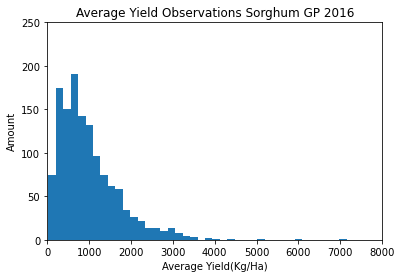

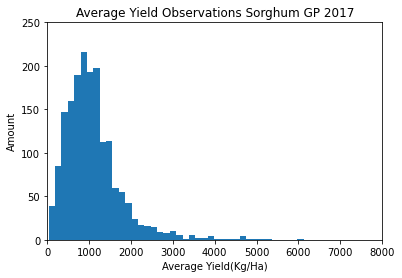

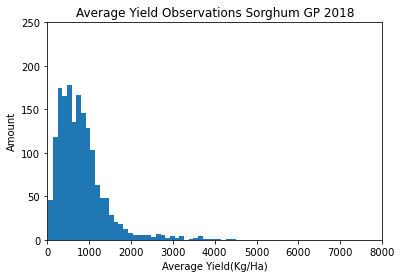

In [23]:
# Plot distribution observations
data = yields_interest[(yields_interest['Gram Panchayat/Hobli'] == 'gp') & (yields_interest['Crop'] == 'sorghum (jowar/great millet)')] # 8081
data = data[data['Average Yield(Kg/Ha)'] != 0]
print(np.size(data,0)) # 4721
data_2016 = data[data['Year'] == 2016]
data_2017 = data[data['Year'] == 2017]
data_2018 = data[data['Year'] == 2018]
avg_value_2016 = np.mean(data_2016['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2016 = np.median(data_2016['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2017 = np.mean(data_2017['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2017 = np.median(data_2017['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2018 = np.mean(data_2018['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2018 = np.median(data_2018['Average Yield(Kg/Ha)']) # 3759 kg/ha  


plt.hist(data_2016['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Sorghum GP 2016')
plt.xlim([0,8000])
plt.ylim([0,250])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2017['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Sorghum GP 2017')
plt.xlim([0,8000])
plt.ylim([0,250])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2018['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Sorghum GP 2018')
plt.xlim([0,8000])
plt.ylim([0,250])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

908


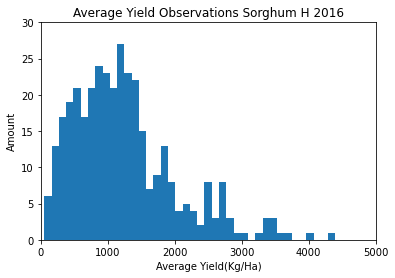

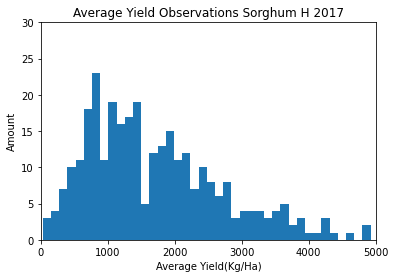

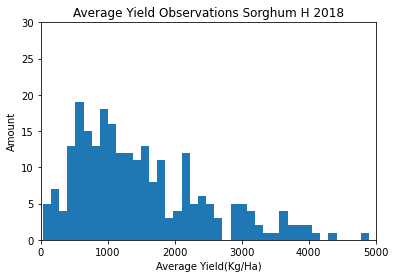

In [24]:
# Plot distribution observations
data = yields_interest[(yields_interest['Gram Panchayat/Hobli'] == 'h') & (yields_interest['Crop'] == 'sorghum (jowar/great millet)')] # 8081
data = data[data['Average Yield(Kg/Ha)'] != 0]
print(np.size(data,0)) # 908
data_2016 = data[data['Year'] == 2016]
data_2017 = data[data['Year'] == 2017]
data_2018 = data[data['Year'] == 2018]
avg_value_2016 = np.mean(data_2016['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2016 = np.median(data_2016['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2017 = np.mean(data_2017['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2017 = np.median(data_2017['Average Yield(Kg/Ha)']) # 3759 kg/ha  
avg_value_2018 = np.mean(data_2018['Average Yield(Kg/Ha)']) # 3756 kg/ha
median_value_2018 = np.median(data_2018['Average Yield(Kg/Ha)']) # 3759 kg/ha  


plt.hist(data_2016['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Sorghum H 2016')
plt.xlim([0,5000])
plt.ylim([0,30])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2017['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Sorghum H 2017')
plt.xlim([0,5000])
plt.ylim([0,30])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()

plt.hist(data_2018['Average Yield(Kg/Ha)'], bins = 40)
plt.title('Average Yield Observations Sorghum H 2018')
plt.xlim([0,5000])
plt.ylim([0,30])
plt.xlabel('Average Yield(Kg/Ha)')
plt.ylabel('Amount')
plt.show()